# PROBLEM STATEMENT 

- PREDICTING THE APPLIANCES ENERGY IN A HOUSE GIVEN THE DATASET 

        In the dataset, we have 28 predictors all charging toward predicting a response (Appliances Energy)

# DATASET CONTENT 

- 1 response
- 28 predictors 

- Dataset attribute:
    - Date, time year-month-day hour:minute:second
    - Appliances, energy use in Wh
    - lights, energy use of light fixtures in the house in Wh
    - T1, Temperature in kitchen area, in Celsius
    - RH_1, Humidity in kitchen area, in %
    - T2, Temperature in living room area, in Celsius
    - RH_2, Humidity in living room area, in %
    - T3, Temperature in laundry room area
    - RH_3, Humidity in laundry room area, in %
    - T4, Temperature in office room, in Celsius
    - RH_4, Humidity in office room, in %
    - T5, Temperature in bathroom, in Celsius
    - RH_5, Humidity in bathroom, in %
    - T6, Temperature outside the building (north side), in Celsius
    - RH_6, Humidity outside the building (north side), in %
    - T7, Temperature in ironing room , in Celsius
    - RH_7, Humidity in ironing room, in %
    - T8, Temperature in teenager room 2, in Celsius
    - RH_8, Humidity in teenager room 2, in %
    - T9, Temperature in parents room, in Celsius
    - RH_9, Humidity in parents room, in %
    - To, Temperature outside (from Chievres weather station), in Celsius
    - Pressure (from Chievres weather station), in mm Hg
    - RH_out, Humidity outside (from Chievres weather station), in %
    - Wind speed (from Chievres weather station), in m/s
    - Visibility (from Chievres weather station), in km
    - Tdewpoint (from Chievres weather station), Â°C
    - rv1, Random variable 1, nondimensional
    - rv2, Random variable 2, nondimensional

# Project Workflow 

# 1. Importing Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats

# 2. Import the Dataset 

In [2]:
energydata = pd.read_csv("energydata_complete.csv")

In [3]:
# reading data 

energydata

date  Appliances  lights         T1       RH_1  \
0      2016-01-11 17:00:00          60      30  19.890000  47.596667   
1      2016-01-11 17:10:00          60      30  19.890000  46.693333   
2      2016-01-11 17:20:00          50      30  19.890000  46.300000   
3      2016-01-11 17:30:00          50      40  19.890000  46.066667   
4      2016-01-11 17:40:00          60      40  19.890000  46.333333   
...                    ...         ...     ...        ...        ...   
19730  2016-05-27 17:20:00         100       0  25.566667  46.560000   
19731  2016-05-27 17:30:00          90       0  25.500000  46.500000   
19732  2016-05-27 17:40:00         270      10  25.500000  46.596667   
19733  2016-05-27 17:50:00         420      10  25.500000  46.990000   
19734  2016-05-27 18:00:00         430      10  25.500000  46.600000   

              T2       RH_2         T3       RH_3         T4  ...         T9  \
0      19.200000  44.790000  19.790000  44.730000  19.000000  ...  17.033333   
1      19.200000  44.722500  19.790000  44.790000  19.000000  ...  17.066667   
2      19.200000  44.626667  19.790000  44.933333  18.926667  ...  17.000000   
3      19.200000  44.590000  19.790000  45.000000  18.890000  ...  17.000000   
4      19.200000  44.530000  19.790000  45.000000  18.890000  ...  17.000000   
...          ...        ...        ...        ...        ...  ...        ...   
19730  25.890000  42.025714  27.200000  41.163333  24.700000  ...  23.200000   
19731  25.754000  42.080000  27.133333  41.223333  24.700000  ...  23.200000   
19732  25.628571  42.768571  27.050000  41.690000  24.700000  ...  23.200000   
19733  25.414000  43.036000  26.890000  41.290000  24.700000  ...  23.200000   
19734  25.264286  42.971429  26.823333  41.156667  24.700000  ...  23.200000   

          RH_9      T_out  Press_mm_hg     RH_out  Windspeed  Visibility  \
0      45.5300   6.600000        733.5  92.000000   7.000000   63.000000   
1      45.5600   6.483333        733.6  92.000000   6.666667   59.166667   
2      45.5000   6.366667        733.7  92.000000   6.333333   55.333333   
3      45.4000   6.250000        733.8  92.000000   6.000000   51.500000   
4      45.4000   6.133333        733.9  92.000000   5.666667   47.666667   
...        ...        ...          ...        ...        ...         ...   
19730  46.7900  22.733333        755.2  55.666667   3.333333   23.666667   
19731  46.7900  22.600000        755.2  56.000000   3.500000   24.500000   
19732  46.7900  22.466667        755.2  56.333333   3.666667   25.333333   
19733  46.8175  22.333333        755.2  56.666667   3.833333   26.166667   
19734  46.8450  22.200000        755.2  57.000000   4.000000   27.000000   

       Tdewpoint        rv1        rv2  
0       5.300000  13.275433  13.275433  
1       5.200000  18.606195  18.606195  
2       5.100000  28.642668  28.642668  
3       5.000000  45.410389  45.410389  
4       4.900000  10.084097  10.084097  
...          ...        ...        ...  
19730  13.333333  43.096812  43.096812  
19731  13.300000  49.282940  49.282940  
19732  13.266667  29.199117  29.199117  
19733  13.233333   6.322784   6.322784  
19734  13.200000  34.118851  34.118851  

[19735 rows x 29 columns]

- From the reading data, we have;
    - 29 columns 
    - 19735 rows

# 3. Checking the Dataset Info 

In [4]:
# computing the missing data against 
# the percentage  

total_missing = energydata.isnull().sum().sort_values(ascending=False)
percent_missing = (energydata.isnull().sum()/energydata.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total_missing, percent_missing], axis=1, keys=['Total_missing', 'Percentage_missing'])
missing_data
                   
                   
                   
                   
                   

Total_missing  Percentage_missing
date                     0                 0.0
T7                       0                 0.0
rv1                      0                 0.0
Tdewpoint                0                 0.0
Visibility               0                 0.0
Windspeed                0                 0.0
RH_out                   0                 0.0
Press_mm_hg              0                 0.0
T_out                    0                 0.0
RH_9                     0                 0.0
T9                       0                 0.0
RH_8                     0                 0.0
T8                       0                 0.0
RH_7                     0                 0.0
RH_6                     0                 0.0
Appliances               0                 0.0
T6                       0                 0.0
RH_5                     0                 0.0
T5                       0                 0.0
RH_4                     0                 0.0
T4                       0                 0.0
RH_3                     0                 0.0
T3                       0                 0.0
RH_2                     0                 0.0
T2                       0                 0.0
RH_1                     0                 0.0
T1                       0                 0.0
lights                   0                 0.0
rv2                      0                 0.0

We have no missing data in the dataset

In [5]:
# checking the decriptive statistics summary 
# of the dataset 

energydata.describe()

Appliances        lights            T1          RH_1            T2  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      97.694958      3.801875     21.686571     40.259739     20.341219   
std      102.524891      7.935988      1.606066      3.979299      2.192974   
min       10.000000      0.000000     16.790000     27.023333     16.100000   
25%       50.000000      0.000000     20.760000     37.333333     18.790000   
50%       60.000000      0.000000     21.600000     39.656667     20.000000   
75%      100.000000      0.000000     22.600000     43.066667     21.500000   
max     1080.000000     70.000000     26.260000     63.360000     29.856667   

               RH_2            T3          RH_3            T4          RH_4  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      40.420420     22.267611     39.242500     20.855335     39.026904   
std        4.069813      2.006111      3.254576      2.042884      4.341321   
min       20.463333     17.200000     28.766667     15.100000     27.660000   
25%       37.900000     20.790000     36.900000     19.530000     35.530000   
50%       40.500000     22.100000     38.530000     20.666667     38.400000   
75%       43.260000     23.290000     41.760000     22.100000     42.156667   
max       56.026667     29.236000     50.163333     26.200000     51.090000   

       ...            T9          RH_9         T_out   Press_mm_hg  \
count  ...  19735.000000  19735.000000  19735.000000  19735.000000   
mean   ...     19.485828     41.552401      7.411665    755.522602   
std    ...      2.014712      4.151497      5.317409      7.399441   
min    ...     14.890000     29.166667     -5.000000    729.300000   
25%    ...     18.000000     38.500000      3.666667    750.933333   
50%    ...     19.390000     40.900000      6.916667    756.100000   
75%    ...     20.600000     44.338095     10.408333    760.933333   
max    ...     24.500000     53.326667     26.100000    772.300000   

             RH_out     Windspeed    Visibility     Tdewpoint           rv1  \
count  19735.000000  19735.000000  19735.000000  19735.000000  19735.000000   
mean      79.750418      4.039752     38.330834      3.760707     24.988033   
std       14.901088      2.451221     11.794719      4.194648     14.496634   
min       24.000000      0.000000      1.000000     -6.600000      0.005322   
25%       70.333333      2.000000     29.000000      0.900000     12.497889   
50%       83.666667      3.666667     40.000000      3.433333     24.897653   
75%       91.666667      5.500000     40.000000      6.566667     37.583769   
max      100.000000     14.000000     66.000000     15.500000     49.996530   

                rv2  
count  19735.000000  
mean      24.988033  
std       14.496634  
min        0.005322  
25%       12.497889  
50%       24.897653  
75%       37.583769  
max       49.996530  

[8 rows x 28 columns]

In [6]:
# storing the predictor variables

predictors = energydata.drop(['Appliances'], axis=1)
predictors

date  lights         T1       RH_1         T2  \
0      2016-01-11 17:00:00      30  19.890000  47.596667  19.200000   
1      2016-01-11 17:10:00      30  19.890000  46.693333  19.200000   
2      2016-01-11 17:20:00      30  19.890000  46.300000  19.200000   
3      2016-01-11 17:30:00      40  19.890000  46.066667  19.200000   
4      2016-01-11 17:40:00      40  19.890000  46.333333  19.200000   
...                    ...     ...        ...        ...        ...   
19730  2016-05-27 17:20:00       0  25.566667  46.560000  25.890000   
19731  2016-05-27 17:30:00       0  25.500000  46.500000  25.754000   
19732  2016-05-27 17:40:00      10  25.500000  46.596667  25.628571   
19733  2016-05-27 17:50:00      10  25.500000  46.990000  25.414000   
19734  2016-05-27 18:00:00      10  25.500000  46.600000  25.264286   

            RH_2         T3       RH_3         T4       RH_4  ...         T9  \
0      44.790000  19.790000  44.730000  19.000000  45.566667  ...  17.033333   
1      44.722500  19.790000  44.790000  19.000000  45.992500  ...  17.066667   
2      44.626667  19.790000  44.933333  18.926667  45.890000  ...  17.000000   
3      44.590000  19.790000  45.000000  18.890000  45.723333  ...  17.000000   
4      44.530000  19.790000  45.000000  18.890000  45.530000  ...  17.000000   
...          ...        ...        ...        ...        ...  ...        ...   
19730  42.025714  27.200000  41.163333  24.700000  45.590000  ...  23.200000   
19731  42.080000  27.133333  41.223333  24.700000  45.590000  ...  23.200000   
19732  42.768571  27.050000  41.690000  24.700000  45.730000  ...  23.200000   
19733  43.036000  26.890000  41.290000  24.700000  45.790000  ...  23.200000   
19734  42.971429  26.823333  41.156667  24.700000  45.963333  ...  23.200000   

          RH_9      T_out  Press_mm_hg     RH_out  Windspeed  Visibility  \
0      45.5300   6.600000        733.5  92.000000   7.000000   63.000000   
1      45.5600   6.483333        733.6  92.000000   6.666667   59.166667   
2      45.5000   6.366667        733.7  92.000000   6.333333   55.333333   
3      45.4000   6.250000        733.8  92.000000   6.000000   51.500000   
4      45.4000   6.133333        733.9  92.000000   5.666667   47.666667   
...        ...        ...          ...        ...        ...         ...   
19730  46.7900  22.733333        755.2  55.666667   3.333333   23.666667   
19731  46.7900  22.600000        755.2  56.000000   3.500000   24.500000   
19732  46.7900  22.466667        755.2  56.333333   3.666667   25.333333   
19733  46.8175  22.333333        755.2  56.666667   3.833333   26.166667   
19734  46.8450  22.200000        755.2  57.000000   4.000000   27.000000   

       Tdewpoint        rv1        rv2  
0       5.300000  13.275433  13.275433  
1       5.200000  18.606195  18.606195  
2       5.100000  28.642668  28.642668  
3       5.000000  45.410389  45.410389  
4       4.900000  10.084097  10.084097  
...          ...        ...        ...  
19730  13.333333  43.096812  43.096812  
19731  13.300000  49.282940  49.282940  
19732  13.266667  29.199117  29.199117  
19733  13.233333   6.322784   6.322784  
19734  13.200000  34.118851  34.118851  

[19735 rows x 28 columns]

In [7]:
# checking the decriptive statistics summary 
# of the response variable 

energydata[['Appliances']].describe()

Appliances
count  19735.000000
mean      97.694958
std      102.524891
min       10.000000
25%       50.000000
50%       60.000000
75%      100.000000
max     1080.000000

In [8]:
# storing the response variable

response = energydata['Appliances']
response

0         60
1         60
2         50
3         50
4         60
        ... 
19730    100
19731     90
19732    270
19733    420
19734    430
Name: Appliances, Length: 19735, dtype: int64

In [9]:
# checking the info of all the dataset

energydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

# 4. Exploratory Data Analysis

- Univariate Analysis of the response

/Users/mac/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Appliances', ylabel='Density'>

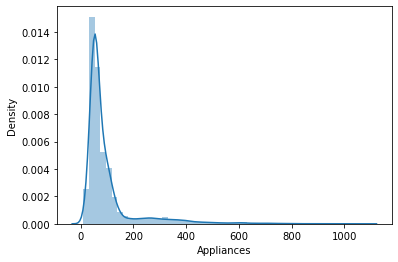

In [10]:
# histogram visualization

sns.distplot(response)

In [11]:
# the skewness and kurtosis of the response 

print('Skewness: %f' % response.skew())
print('Kurtosis: %f' % response.kurt())

Skewness: 3.386367
Kurtosis: 13.667863


- Bivariate Analysis 

In [12]:
# checking the relationship between lights and appliances

lights = energydata[['lights']]
lights.head()

lights
0      30
1      30
2      30
3      40
4      40

<AxesSubplot:xlabel='lights', ylabel='Appliances'>

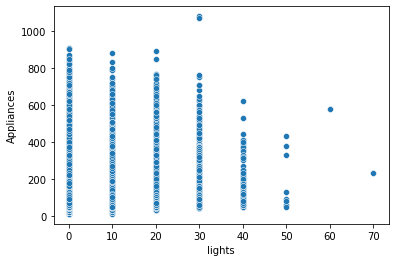

In [13]:
# plotting the relationship between light and Appliances


sns.scatterplot(x='lights', 
                y='Appliances', 
                data = energydata)

<AxesSubplot:xlabel='Windspeed', ylabel='Appliances'>

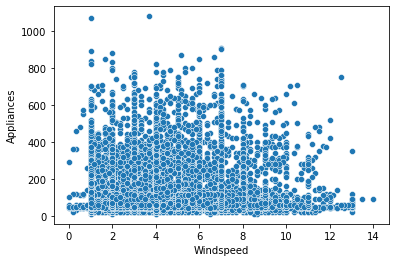

In [14]:
# relationship between appliances and windspeed

sns.scatterplot(x='Windspeed',
                y='Appliances', 
                data = energydata)

<AxesSubplot:xlabel='Visibility', ylabel='Appliances'>

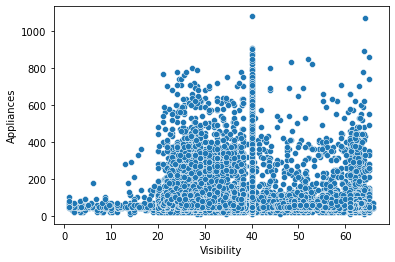

In [15]:
# relationship between appliances and Visibilty

sns.scatterplot(x='Visibility',
                y='Appliances', 
                data = energydata)

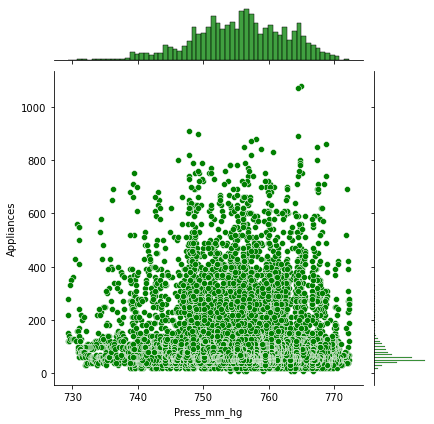

In [16]:
# relationship between appliances and Press_mm_hg


sns.jointplot(x='Press_mm_hg',
              y='Appliances', 
              data = energydata, 
             color = 'green')


<AxesSubplot:xlabel='Tdewpoint', ylabel='Appliances'>

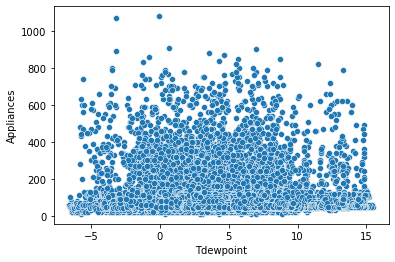

In [17]:
# relationship between appliances and Tdewpoint

sns.scatterplot(x='Tdewpoint', 
                y='Appliances', 
                data = energydata)

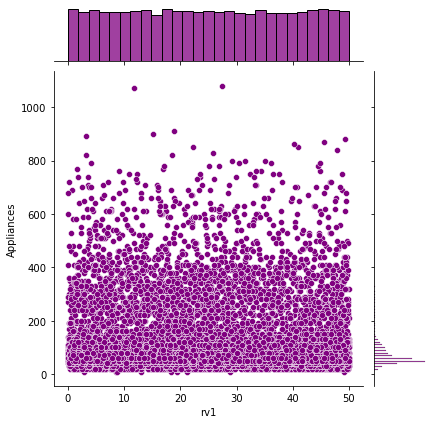

In [18]:
# relationship between appliances and rv1

sns.jointplot(x='rv1',
              y='Appliances', 
              data = energydata, 
             color = 'purple')

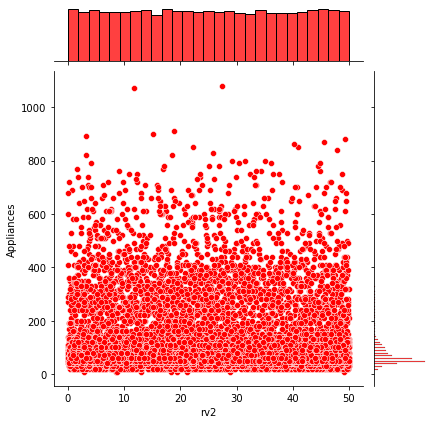

In [19]:
# relationship between appliances and rv2

sns.jointplot(x='rv2',
              y='Appliances', 
              data = energydata, 
             color = 'red')

Multivariate Analysis

- Dividing the predictors along;
    - Temperature and Humidity In and Out of the
    - And others
- Joint them with the response 

In [20]:
predictors.head()

date  lights     T1       RH_1    T2       RH_2     T3  \
0  2016-01-11 17:00:00      30  19.89  47.596667  19.2  44.790000  19.79   
1  2016-01-11 17:10:00      30  19.89  46.693333  19.2  44.722500  19.79   
2  2016-01-11 17:20:00      30  19.89  46.300000  19.2  44.626667  19.79   
3  2016-01-11 17:30:00      40  19.89  46.066667  19.2  44.590000  19.79   
4  2016-01-11 17:40:00      40  19.89  46.333333  19.2  44.530000  19.79   

        RH_3         T4       RH_4  ...         T9   RH_9     T_out  \
0  44.730000  19.000000  45.566667  ...  17.033333  45.53  6.600000   
1  44.790000  19.000000  45.992500  ...  17.066667  45.56  6.483333   
2  44.933333  18.926667  45.890000  ...  17.000000  45.50  6.366667   
3  45.000000  18.890000  45.723333  ...  17.000000  45.40  6.250000   
4  45.000000  18.890000  45.530000  ...  17.000000  45.40  6.133333   

   Press_mm_hg  RH_out  Windspeed  Visibility  Tdewpoint        rv1        rv2  
0        733.5    92.0   7.000000   63.000000        5.3  13.275433  13.275433  
1        733.6    92.0   6.666667   59.166667        5.2  18.606195  18.606195  
2        733.7    92.0   6.333333   55.333333        5.1  28.642668  28.642668  
3        733.8    92.0   6.000000   51.500000        5.0  45.410389  45.410389  
4        733.9    92.0   5.666667   47.666667        4.9  10.084097  10.084097  

[5 rows x 28 columns]

In [21]:
# other predictor variables
# joint with response

other_pre_res = energydata[['date',
                            'Appliances',
                               'lights', 
                              'Press_mm_hg',
                             'Windspeed',
                             'Visibility',
                             'Tdewpoint',
                             'rv1',
                             'rv2']]
other_pre_res

date  Appliances  lights  Press_mm_hg  Windspeed  \
0      2016-01-11 17:00:00          60      30        733.5   7.000000   
1      2016-01-11 17:10:00          60      30        733.6   6.666667   
2      2016-01-11 17:20:00          50      30        733.7   6.333333   
3      2016-01-11 17:30:00          50      40        733.8   6.000000   
4      2016-01-11 17:40:00          60      40        733.9   5.666667   
...                    ...         ...     ...          ...        ...   
19730  2016-05-27 17:20:00         100       0        755.2   3.333333   
19731  2016-05-27 17:30:00          90       0        755.2   3.500000   
19732  2016-05-27 17:40:00         270      10        755.2   3.666667   
19733  2016-05-27 17:50:00         420      10        755.2   3.833333   
19734  2016-05-27 18:00:00         430      10        755.2   4.000000   

       Visibility  Tdewpoint        rv1        rv2  
0       63.000000   5.300000  13.275433  13.275433  
1       59.166667   5.200000  18.606195  18.606195  
2       55.333333   5.100000  28.642668  28.642668  
3       51.500000   5.000000  45.410389  45.410389  
4       47.666667   4.900000  10.084097  10.084097  
...           ...        ...        ...        ...  
19730   23.666667  13.333333  43.096812  43.096812  
19731   24.500000  13.300000  49.282940  49.282940  
19732   25.333333  13.266667  29.199117  29.199117  
19733   26.166667  13.233333   6.322784   6.322784  
19734   27.000000  13.200000  34.118851  34.118851  

[19735 rows x 9 columns]

In [22]:
# temperature and humidity variables within and 
# outside of the house 
# joining with response

temhum_res = energydata[['Appliances',
                         'T1','RH_1','T2',
                        'RH_2','T3','RH_3',
                        'T4','RH_4','T5',
                        'RH_5','T6','RH_6',
                        'T7','RH_7','T8',
                        'RH_8','T9','RH_9',
                        'T_out','RH_out']]
temhum_res

Appliances         T1       RH_1         T2       RH_2         T3  \
0              60  19.890000  47.596667  19.200000  44.790000  19.790000   
1              60  19.890000  46.693333  19.200000  44.722500  19.790000   
2              50  19.890000  46.300000  19.200000  44.626667  19.790000   
3              50  19.890000  46.066667  19.200000  44.590000  19.790000   
4              60  19.890000  46.333333  19.200000  44.530000  19.790000   
...           ...        ...        ...        ...        ...        ...   
19730         100  25.566667  46.560000  25.890000  42.025714  27.200000   
19731          90  25.500000  46.500000  25.754000  42.080000  27.133333   
19732         270  25.500000  46.596667  25.628571  42.768571  27.050000   
19733         420  25.500000  46.990000  25.414000  43.036000  26.890000   
19734         430  25.500000  46.600000  25.264286  42.971429  26.823333   

            RH_3         T4       RH_4         T5  ...         T6       RH_6  \
0      44.730000  19.000000  45.566667  17.166667  ...   7.026667  84.256667   
1      44.790000  19.000000  45.992500  17.166667  ...   6.833333  84.063333   
2      44.933333  18.926667  45.890000  17.166667  ...   6.560000  83.156667   
3      45.000000  18.890000  45.723333  17.166667  ...   6.433333  83.423333   
4      45.000000  18.890000  45.530000  17.200000  ...   6.366667  84.893333   
...          ...        ...        ...        ...  ...        ...        ...   
19730  41.163333  24.700000  45.590000  23.200000  ...  24.796667   1.000000   
19731  41.223333  24.700000  45.590000  23.230000  ...  24.196667   1.000000   
19732  41.690000  24.700000  45.730000  23.230000  ...  23.626667   1.000000   
19733  41.290000  24.700000  45.790000  23.200000  ...  22.433333   1.000000   
19734  41.156667  24.700000  45.963333  23.200000  ...  21.026667   1.000000   

              T7       RH_7       T8       RH_8         T9     RH_9  \
0      17.200000  41.626667  18.2000  48.900000  17.033333  45.5300   
1      17.200000  41.560000  18.2000  48.863333  17.066667  45.5600   
2      17.200000  41.433333  18.2000  48.730000  17.000000  45.5000   
3      17.133333  41.290000  18.1000  48.590000  17.000000  45.4000   
4      17.200000  41.230000  18.1000  48.590000  17.000000  45.4000   
...          ...        ...      ...        ...        ...      ...   
19730  24.500000  44.500000  24.7000  50.074000  23.200000  46.7900   
19731  24.557143  44.414286  24.7000  49.790000  23.200000  46.7900   
19732  24.540000  44.400000  24.7000  49.660000  23.200000  46.7900   
19733  24.500000  44.295714  24.6625  49.518750  23.200000  46.8175   
19734  24.500000  44.054000  24.7360  49.736000  23.200000  46.8450   

           T_out     RH_out  
0       6.600000  92.000000  
1       6.483333  92.000000  
2       6.366667  92.000000  
3       6.250000  92.000000  
4       6.133333  92.000000  
...          ...        ...  
19730  22.733333  55.666667  
19731  22.600000  56.000000  
19732  22.466667  56.333333  
19733  22.333333  56.666667  
19734  22.200000  57.000000  

[19735 rows x 21 columns]

- Plotting the visual for other_pre_res to get an insight into the relationship they have with response target

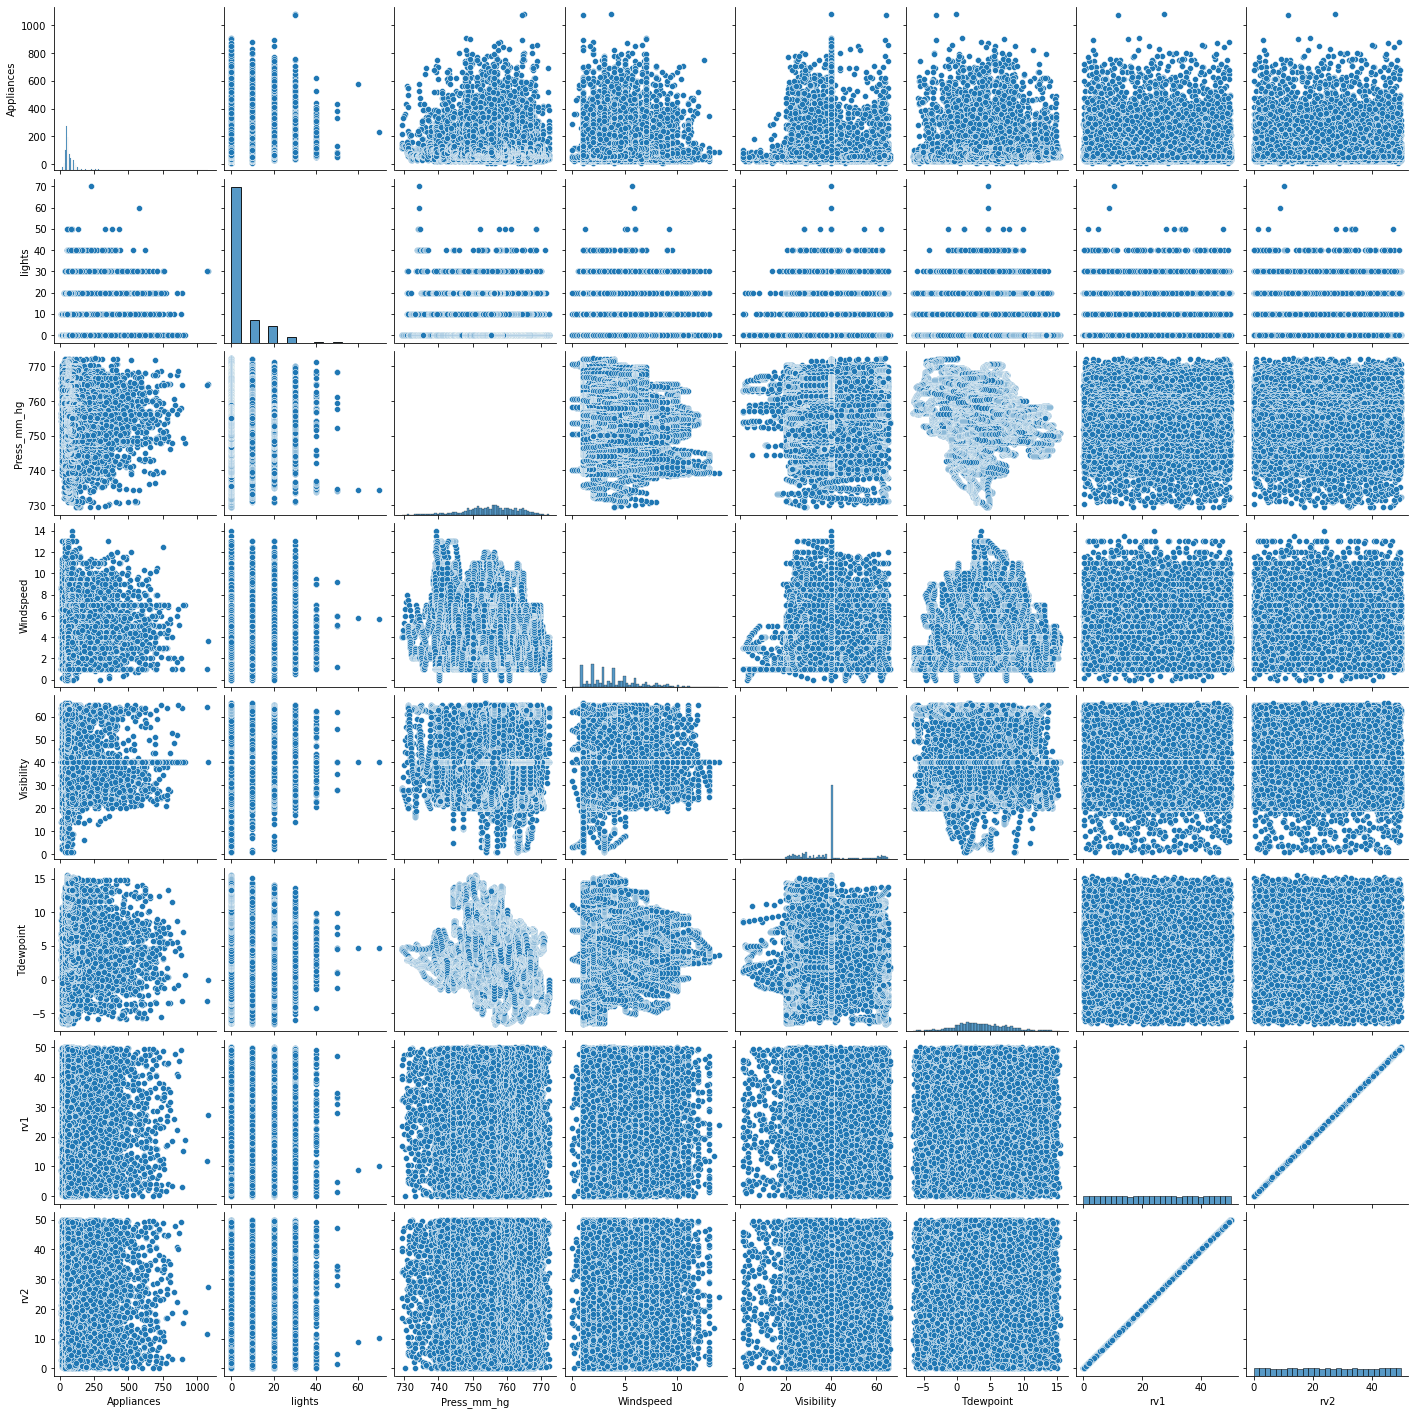

In [23]:
sns.pairplot(other_pre_res)

- creating a for loop to plot the above in distribution

In [25]:
# dropping the date column to be able to plot

other_pre_res22 = other_pre_res.drop(['date'], axis = 1)

In [26]:
# extracting the column names

column_headers = other_pre_res22.columns.values

column_headers

array(['Appliances', 'lights', 'Press_mm_hg', 'Windspeed', 'Visibility',
       'Tdewpoint', 'rv1', 'rv2'], dtype=object)

/Users/mac/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibili

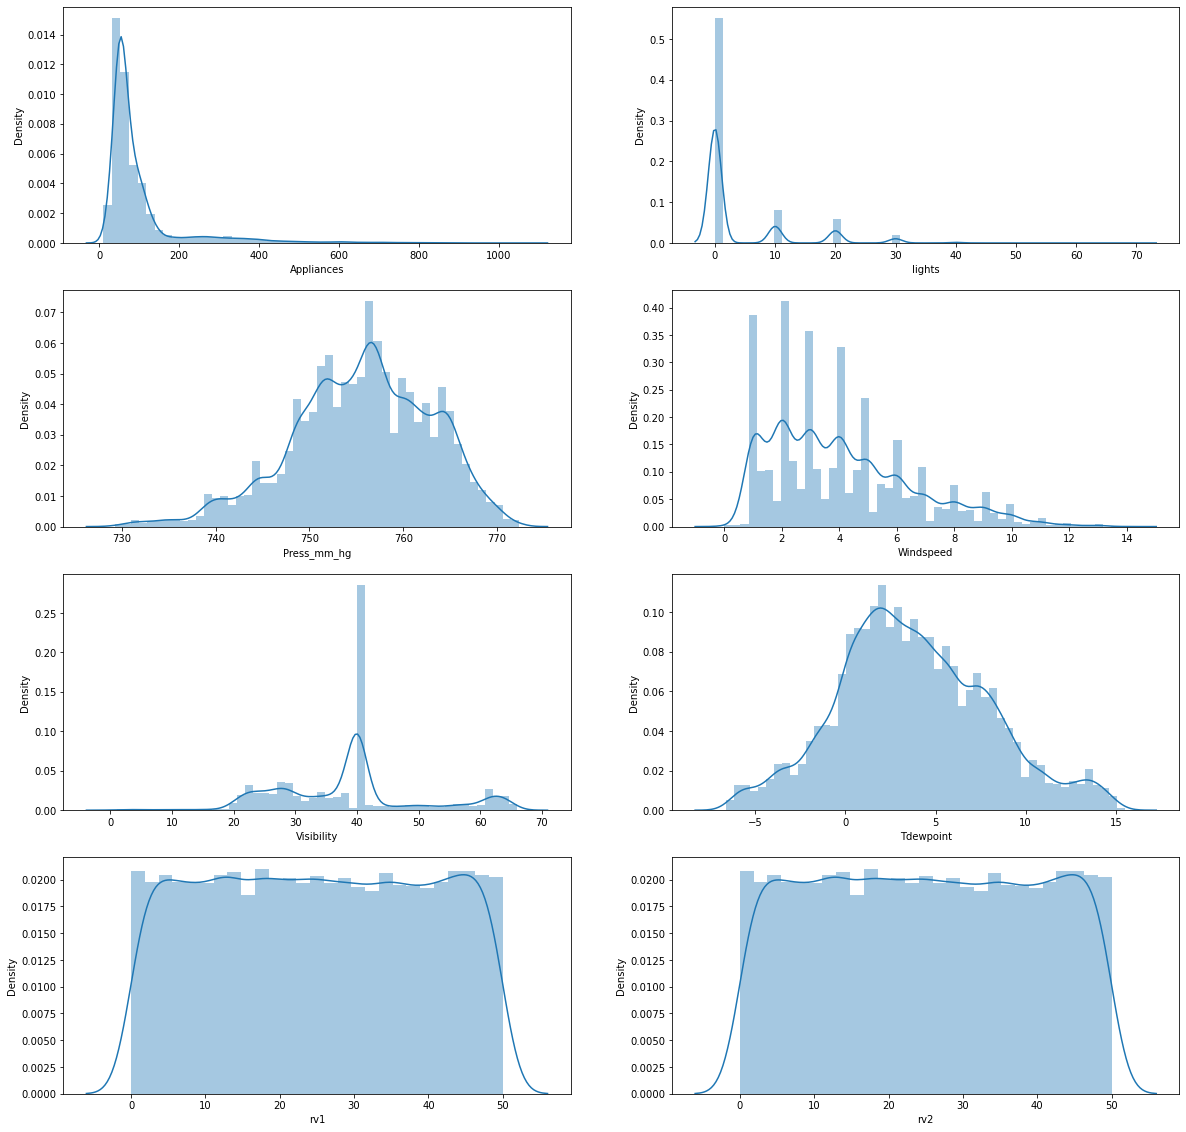

In [27]:
# a for loop dist plot 

n = 1
fig, ax = plt.subplots(4, 2, figsize=(20,20))

for element in column_headers:
    plt.subplot(4,2,n)
    sns.distplot(other_pre_res[element])
    n = n + 1

- checking the correlation between the other variables and response variable

<AxesSubplot:>

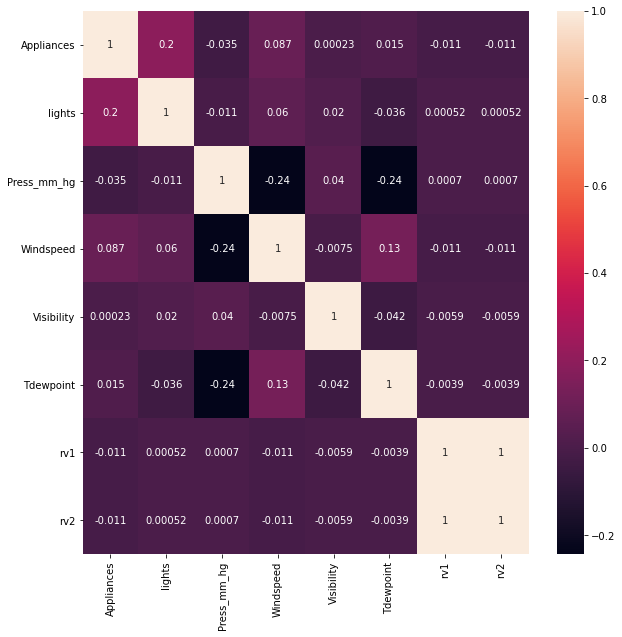

In [28]:
# using .heatmap()
# to plot the correlation

plt.figure(figsize=(10,10))
sns.heatmap(other_pre_res.corr(), annot = True)

/Users/mac/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/

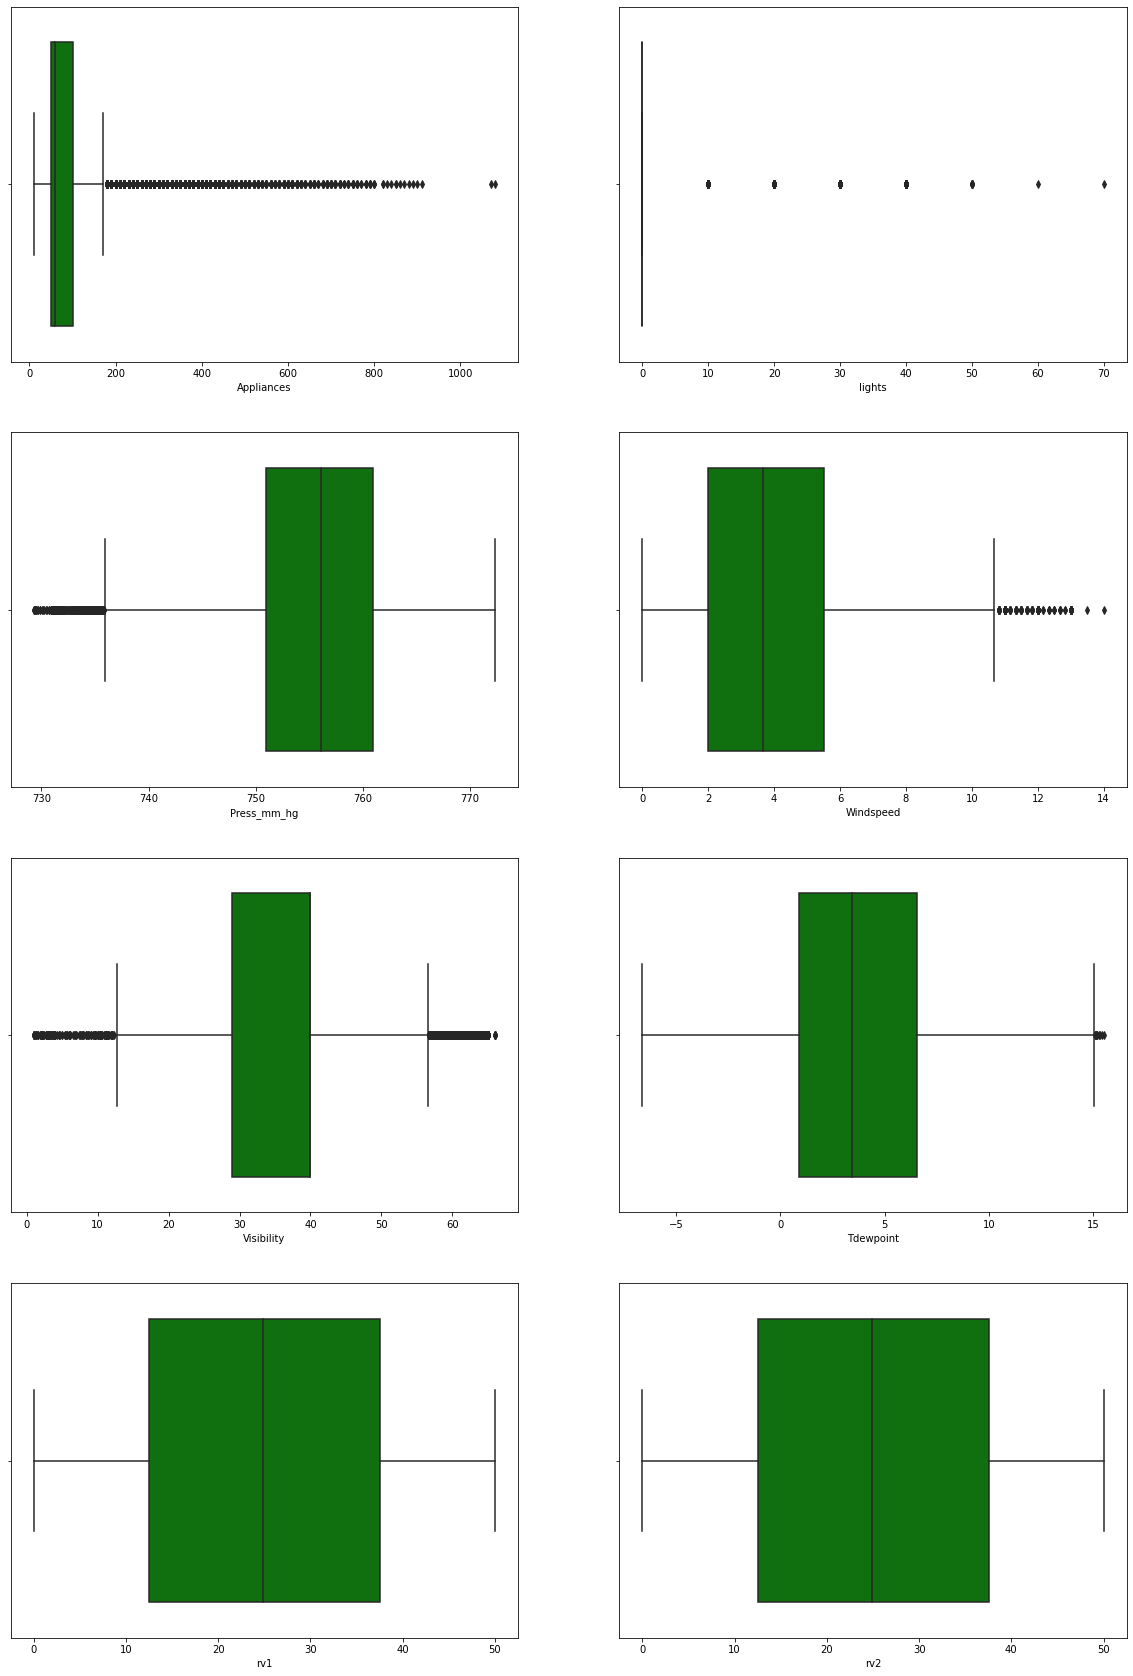

In [29]:
# plotting the box plot 

# a for loop dist plot 

n = 1
fig, ax = plt.subplots(4, 2, figsize=(20,30))

for element in column_headers:
    plt.subplot(4,2,n)
    sns.boxplot(other_pre_res[element],
                color = 'green')
    n = n + 1

- Plotting the visual for temhus_res to get an insight into the relationship they have with response target

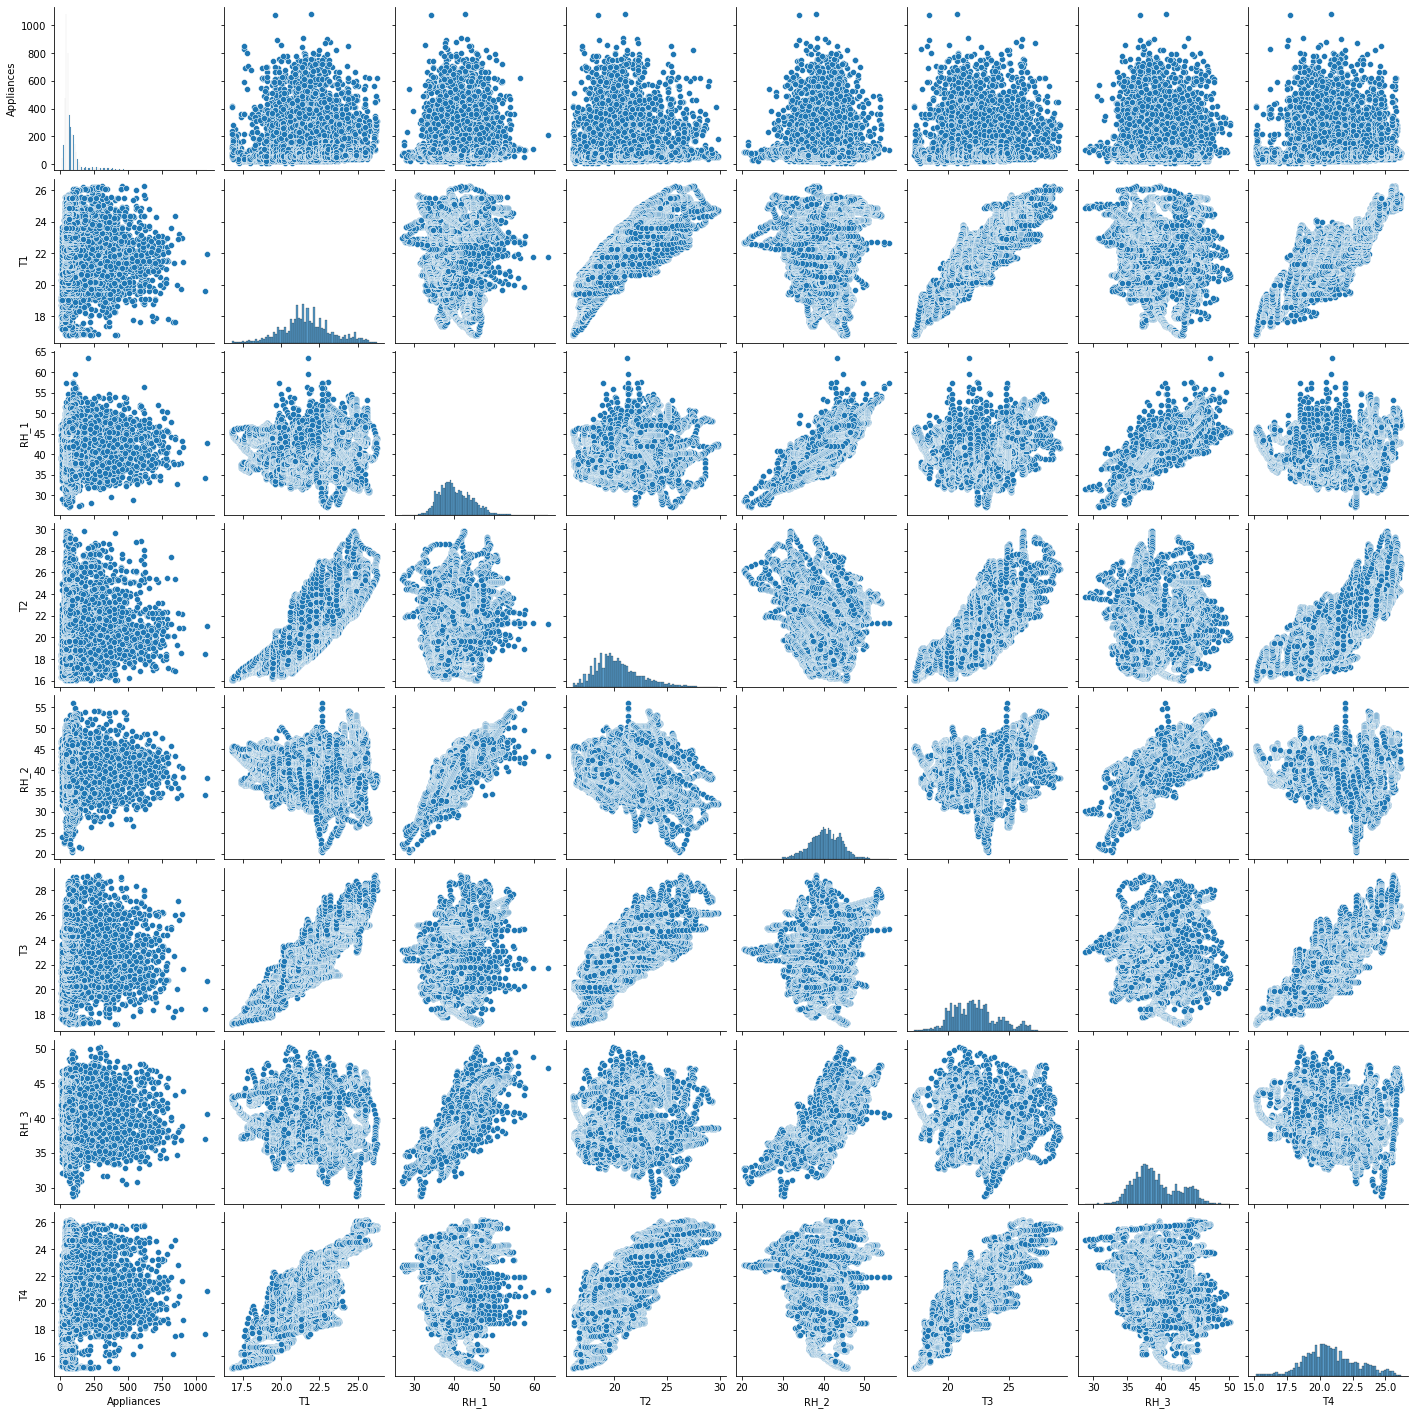

In [30]:
sns.pairplot(temhum_res.iloc[0:, 0:8])

- creating a for loop to plot the above in distribution

In [31]:
# extracting the column names

column_headers2 = temhum_res.columns.values

column_headers2

array(['Appliances', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4',
       'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8',
       'T9', 'RH_9', 'T_out', 'RH_out'], dtype=object)

/Users/mac/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibili

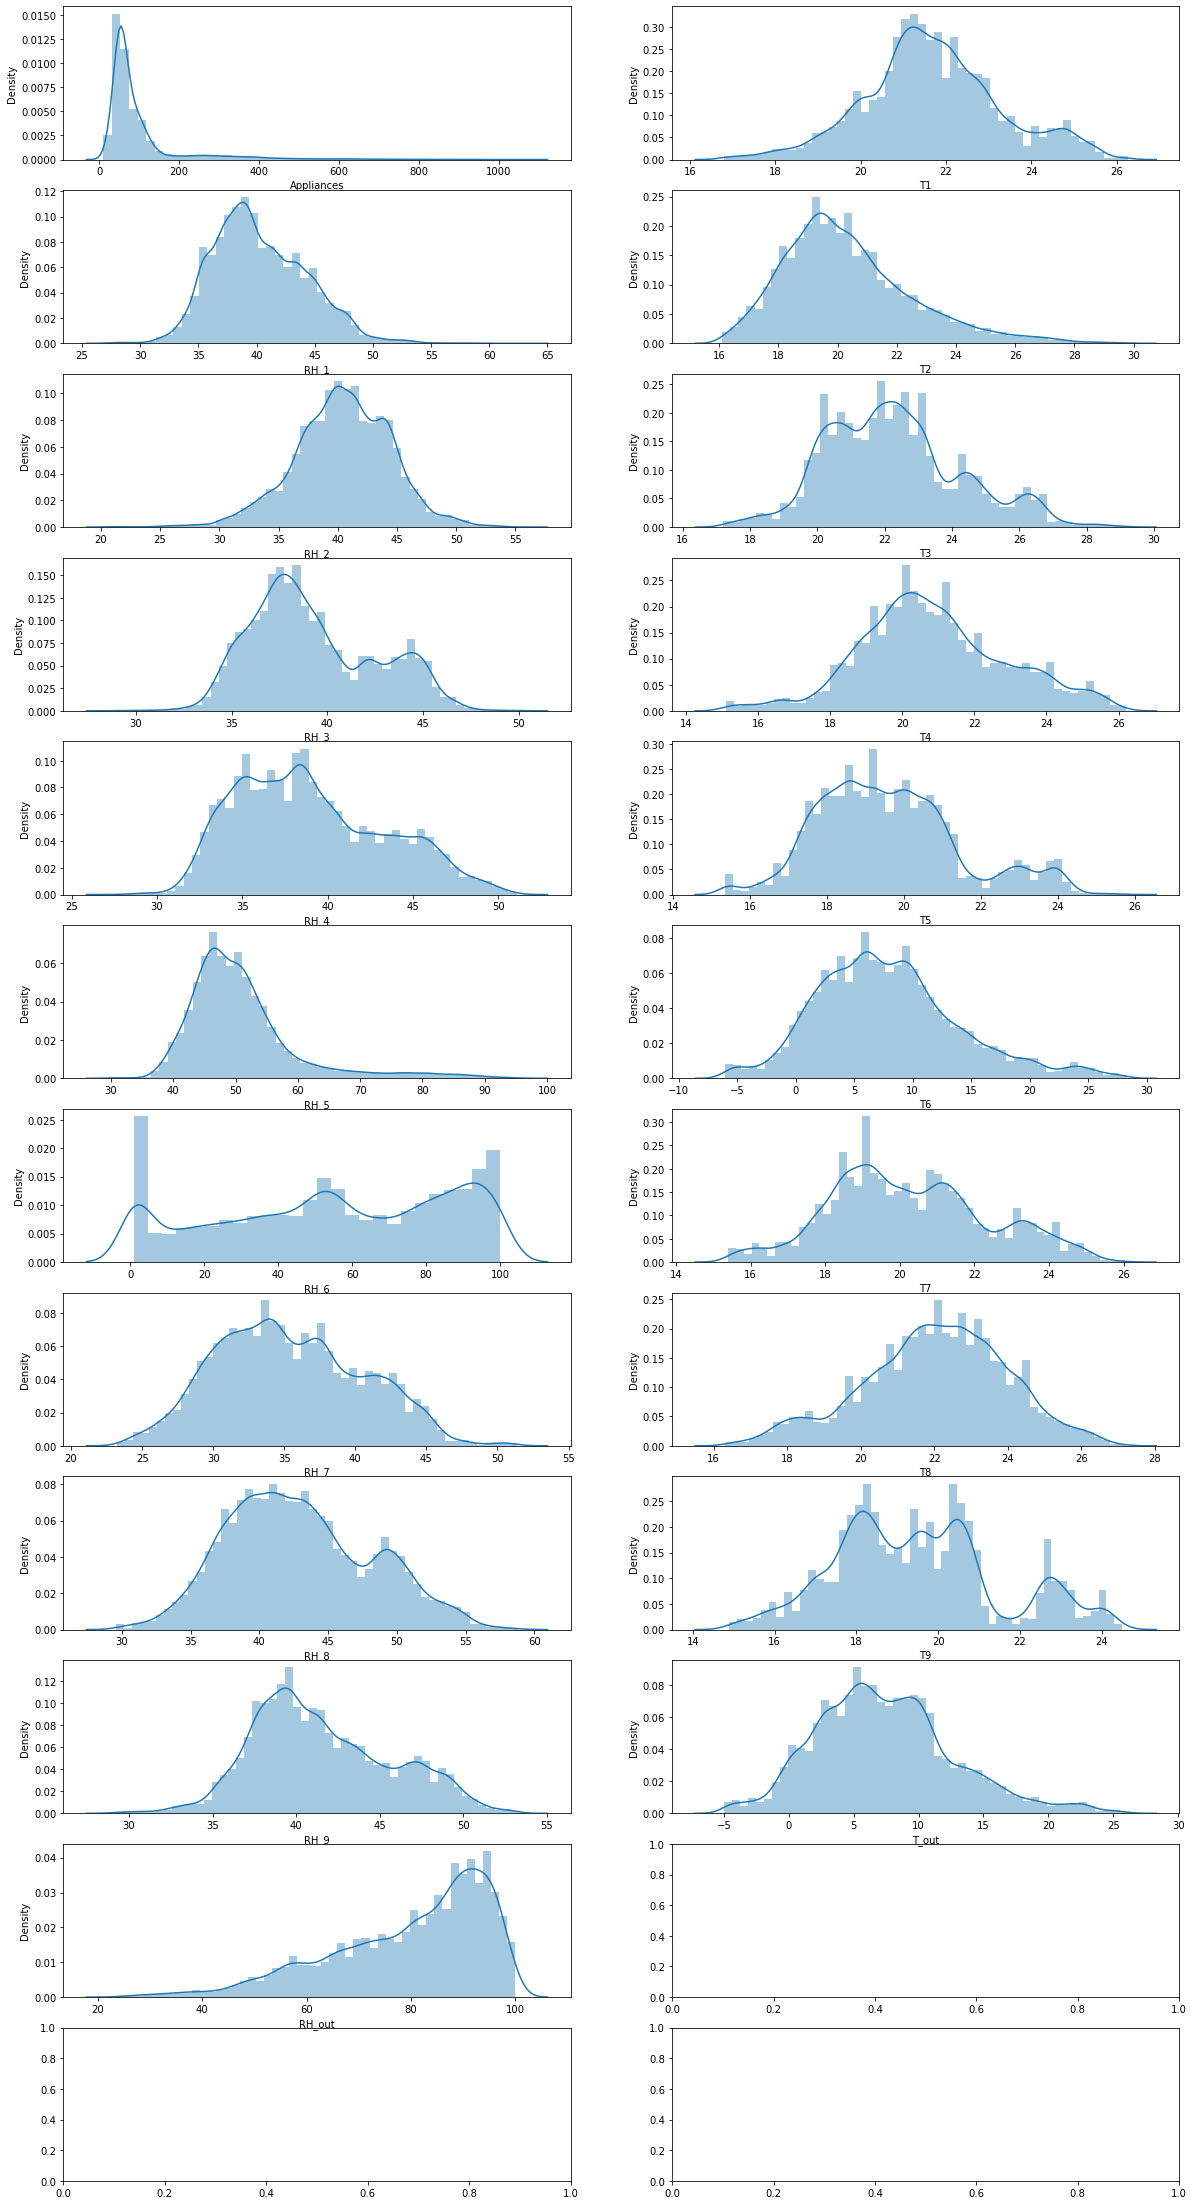

In [32]:
# a for loop dist plot 

i = 1
fig, ax = plt.subplots(12, 2, figsize=(20,40))

for element in column_headers2:
    plt.subplot(12,2,i)
    sns.distplot(temhum_res[element])
    i = i + 1

- checking the correlation between the temperature variables, humidity within and outside the house, and response variable

<AxesSubplot:>

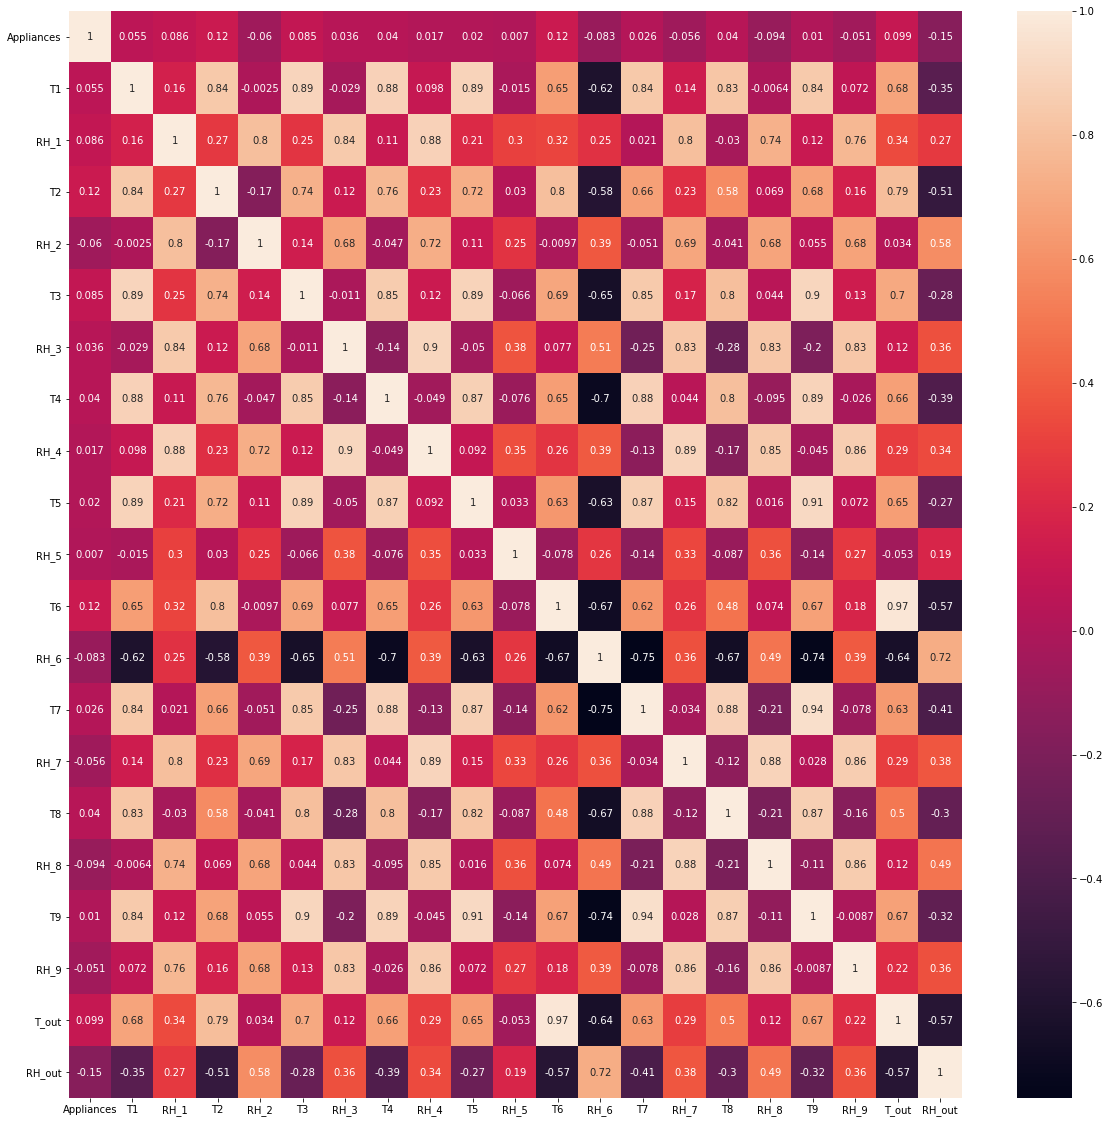

In [33]:
# using .heatmap()
# to plot the correlation

plt.figure(figsize=(20,20))
sns.heatmap(temhum_res.corr(), annot = True)

/Users/mac/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/mac/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/

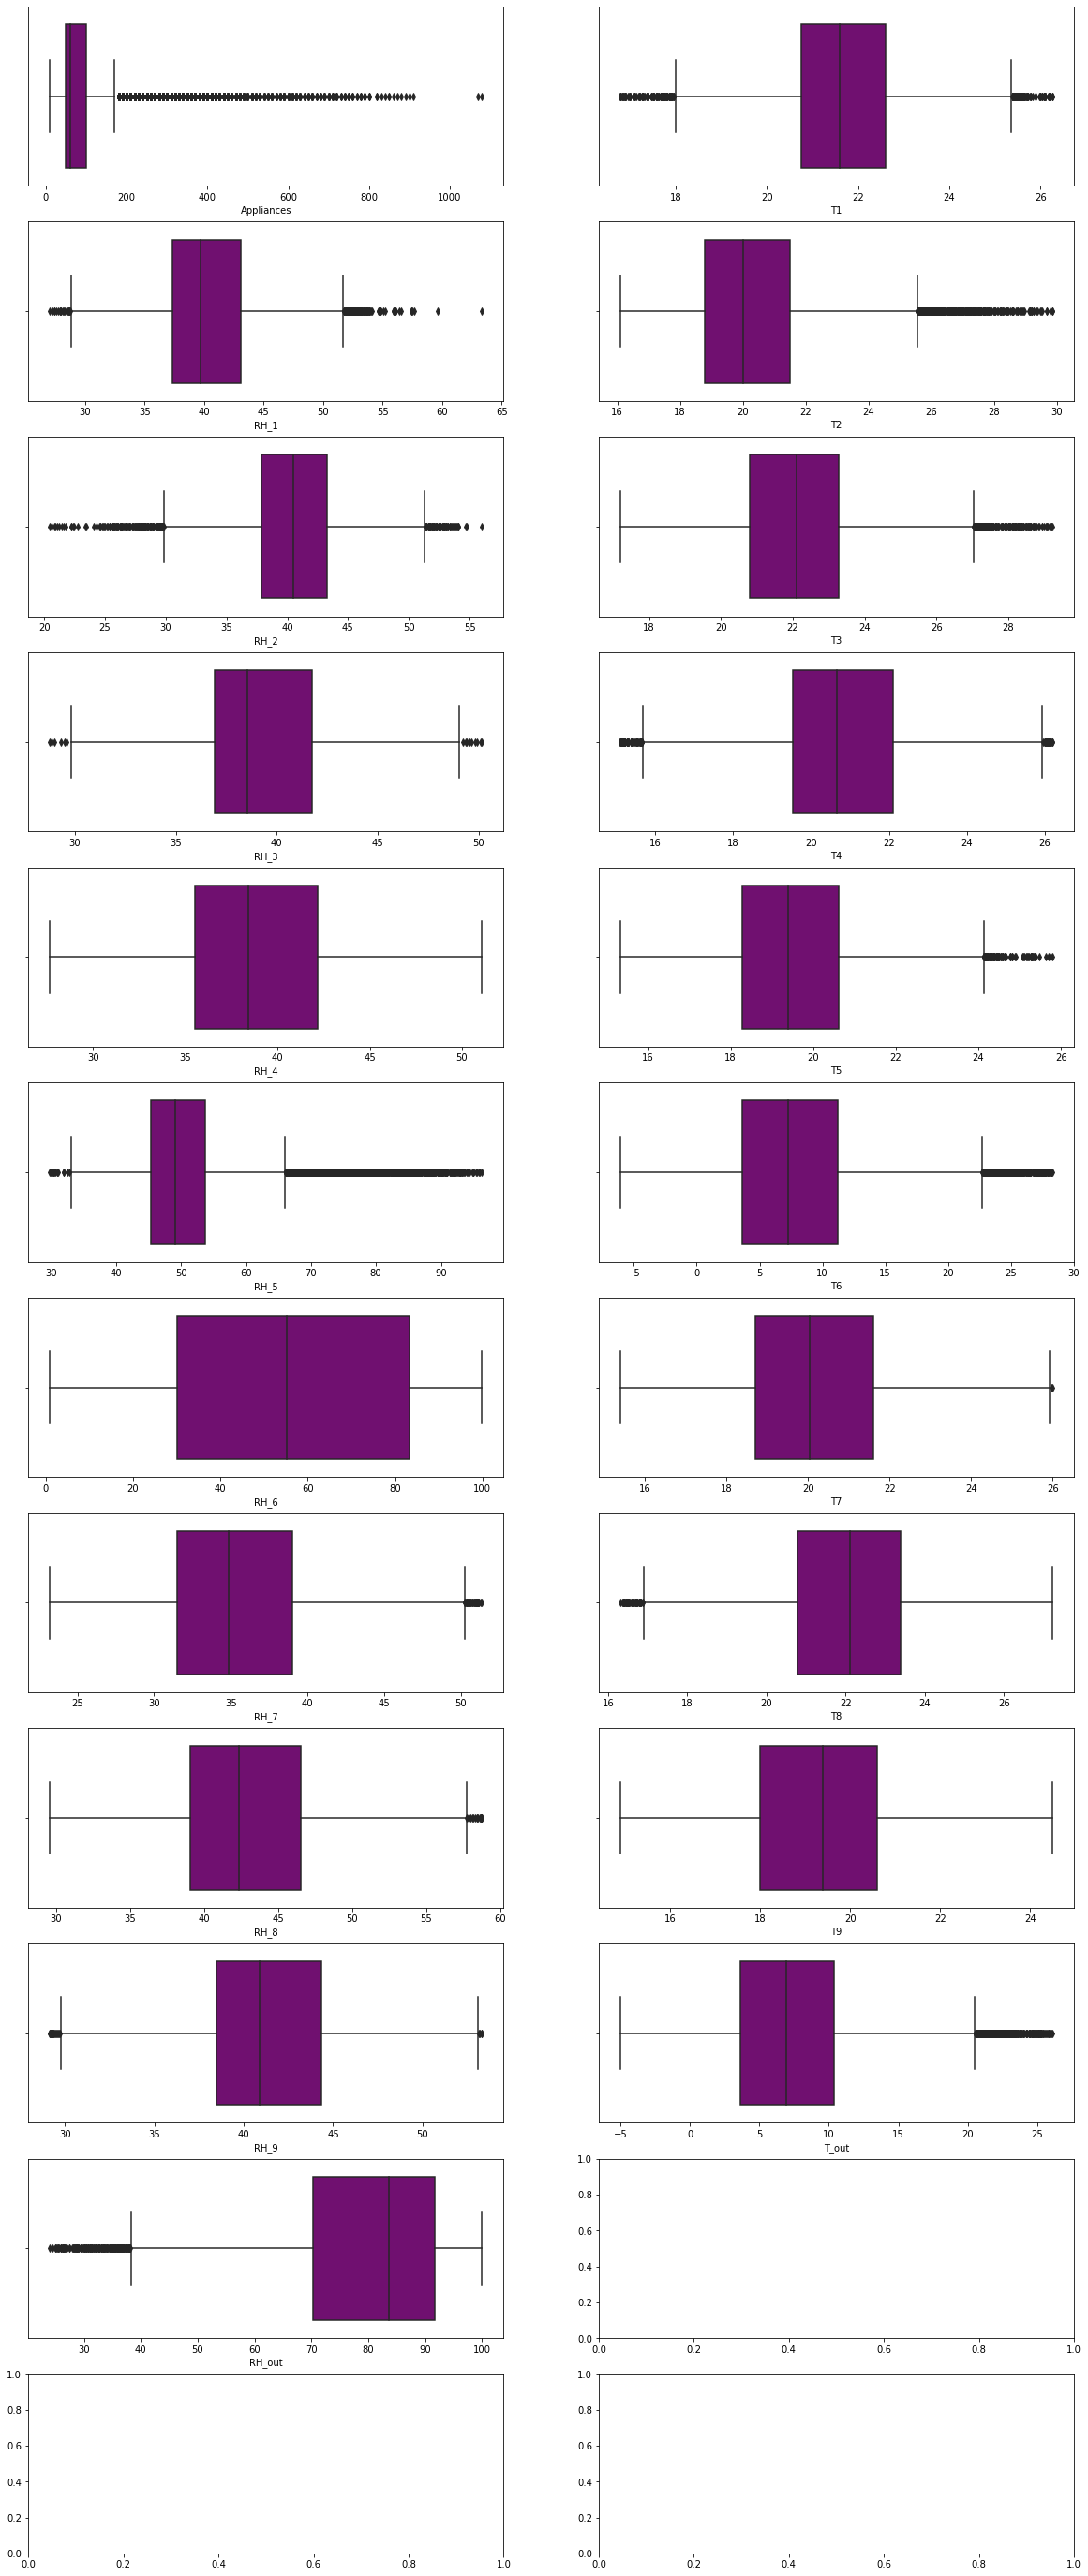

In [34]:
# plotting the box plot 

# a for loop dist plot 

n = 1
fig, ax = plt.subplots(12, 2, figsize=(20,50))

for element in column_headers2:
    plt.subplot(12,2,n)
    sns.boxplot(temhum_res[element],
                color = 'purple')
    n = n + 1

# 5. Normalising the Dataset

In [35]:
# importing from sklearn

from sklearn.preprocessing import MinMaxScaler

In [36]:
Scaler = MinMaxScaler()

In [37]:
predictors = predictors.drop(['date'], axis=1)

In [38]:
# normalising the predictors

feature_normalised = pd.DataFrame(Scaler.fit_transform(predictors),
                            columns = predictors.columns)

feature_normalised.head()

lights       T1      RH_1        T2      RH_2        T3      RH_3  \
0  0.428571  0.32735  0.566187  0.225345  0.684038  0.215188  0.746066   
1  0.428571  0.32735  0.541326  0.225345  0.682140  0.215188  0.748871   
2  0.428571  0.32735  0.530502  0.225345  0.679445  0.215188  0.755569   
3  0.571429  0.32735  0.524080  0.225345  0.678414  0.215188  0.758685   
4  0.571429  0.32735  0.531419  0.225345  0.676727  0.215188  0.758685   

         T4      RH_4        T5  ...        T9      RH_9     T_out  \
0  0.351351  0.764262  0.175506  ...  0.223032  0.677290  0.372990   
1  0.351351  0.782437  0.175506  ...  0.226500  0.678532  0.369239   
2  0.344745  0.778062  0.175506  ...  0.219563  0.676049  0.365488   
3  0.341441  0.770949  0.175506  ...  0.219563  0.671909  0.361736   
4  0.341441  0.762697  0.178691  ...  0.219563  0.671909  0.357985   

   Press_mm_hg    RH_out  Windspeed  Visibility  Tdewpoint       rv1       rv2  
0     0.097674  0.894737   0.500000    0.953846   0.538462  0.265449  0.265449  
1     0.100000  0.894737   0.476190    0.894872   0.533937  0.372083  0.372083  
2     0.102326  0.894737   0.452381    0.835897   0.529412  0.572848  0.572848  
3     0.104651  0.894737   0.428571    0.776923   0.524887  0.908261  0.908261  
4     0.106977  0.894737   0.404762    0.717949   0.520362  0.201611  0.201611  

[5 rows x 27 columns]

In [39]:
date_dropped = energydata.drop(['date'], axis=1)

date_dropped = pd.DataFrame(Scaler.fit_transform(date_dropped), columns = date_dropped.columns)

In [40]:
# normalised the response

response_normalised = date_dropped['Appliances']
response_normalised

0        0.046729
1        0.046729
2        0.037383
3        0.037383
4        0.046729
           ...   
19730    0.084112
19731    0.074766
19732    0.242991
19733    0.383178
19734    0.392523
Name: Appliances, Length: 19735, dtype: float64

# 6. Creating Training and Testing Dataset/Data Cleaning 

In [41]:
y = response_normalised

In [42]:
X = feature_normalised

In [43]:
# importing the dataset split module from sklearn

from sklearn.model_selection import train_test_split

In [44]:
# Splitting the data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,
                                                   random_state =42)

In [45]:
X_train

lights        T1      RH_1        T2      RH_2        T3      RH_3  \
9129      0.0  0.497360  0.236767  0.122850  0.565939  0.373878  0.303474   
2453      0.0  0.286167  0.482616  0.188999  0.669978  0.217957  0.735317   
9152      0.0  0.422386  0.230529  0.057427  0.606430  0.373878  0.338059   
12694     0.0  0.560718  0.446840  0.280834  0.704002  0.514290  0.515189   
16952     0.0  0.835269  0.422071  1.000000  0.318493  0.745383  0.459106   
...       ...       ...       ...       ...       ...       ...       ...   
11284     0.0  0.524815  0.381892  0.239157  0.636236  0.481888  0.478268   
11964     0.0  0.591341  0.458949  0.428883  0.607461  0.456962  0.582489   
5390      0.0  0.369588  0.238785  0.152653  0.481582  0.240944  0.412370   
860       0.0  0.527983  0.234933  0.315047  0.412016  0.332336  0.380122   
15795     0.0  0.478705  0.294652  0.275503  0.509045  0.456962  0.365633   

             T4      RH_4        T5  ...        T9      RH_9     T_out  \
9129   0.476577  0.264760  0.408027  ...  0.475893  0.376380  0.168810   
2453   0.270270  0.691421  0.178691  ...  0.240375  0.703504  0.262594   
9152   0.414414  0.236449  0.378404  ...  0.468262  0.409803  0.110397   
12694  0.540541  0.486556  0.509317  ...  0.561915  0.340784  0.444802   
16952  0.900901  0.516432  0.748845  ...  0.854318  0.633278  0.849946   
...         ...       ...       ...  ...       ...       ...       ...   
11284  0.576577  0.517712  0.455805  ...  0.568852  0.471578  0.468382   
11964  0.557658  0.702518  0.417582  ...  0.561915  0.625966  0.717042   
5390   0.279279  0.325651  0.302914  ...  0.312175  0.426325  0.126474   
860    0.540541  0.341585  0.259914  ...  0.375650  0.509106  0.227224   
15795  0.414414  0.502490  0.369804  ...  0.468262  0.500828  0.374598   

       Press_mm_hg    RH_out  Windspeed  Visibility  Tdewpoint       rv1  \
9129      0.862791  0.776316   0.142857    0.984615   0.192308  0.724554   
2453      0.836434  0.807018   0.142857    0.600000   0.342383  0.864041   
9152      0.853488  0.859649   0.095238    0.917949   0.158371  0.499502   
12694     0.559690  0.750000   0.119048    0.384615   0.558069  0.323173   
16952     0.530233  0.355263   0.142857    0.600000   0.787330  0.341060   
...            ...       ...        ...         ...        ...       ...   
11284     0.492248  0.706140   0.476190    0.600000   0.562594  0.910318   
11964     0.469767  0.552632   0.142857    0.600000   0.791855  0.698711   
5390      0.595349  0.828947   0.261905    0.948718   0.165913  0.381388   
860       0.831008  0.530702   0.095238    0.600000   0.114630  0.020909   
15795     0.682558  0.809211   0.071429    0.600000   0.495475  0.349076   

            rv2  
9129   0.724554  
2453   0.864041  
9152   0.499502  
12694  0.323173  
16952  0.341060  
...         ...  
11284  0.910318  
11964  0.698711  
5390   0.381388  
860    0.020909  
15795  0.349076  

[13814 rows x 27 columns]

In [46]:
X_test

lights        T1      RH_1        T2      RH_2        T3      RH_3  \
8980   0.000000  0.432946  0.230529  0.120669  0.525822  0.256730  0.380122   
2754   0.142857  0.538543  0.717641  0.377272  0.700066  0.368339  0.956224   
9132   0.000000  0.485744  0.233281  0.111461  0.564252  0.371109  0.300670   
14359  0.000000  0.485744  0.385561  0.566271  0.404255  0.401573  0.381679   
8875   0.000000  0.335093  0.223007  0.026411  0.552910  0.232635  0.356753   
...         ...       ...       ...       ...       ...       ...       ...   
831    0.000000  0.560718  0.300248  0.370487  0.412504  0.386895  0.576414   
10993  0.000000  0.518479  0.310063  0.225345  0.593214  0.481888  0.446799   
11761  0.000000  0.436818  0.340611  0.188999  0.633705  0.381356  0.403490   
12364  0.428571  0.550158  0.390973  0.334383  0.602774  0.481888  0.468453   
11863  0.000000  0.432946  0.420145  0.213230  0.688912  0.365570  0.482474   

             T4      RH_4        T5  ...        T9      RH_9     T_out  \
8980   0.419820  0.279129  0.312470  ...  0.457856  0.408251  0.217578   
2754   0.489489  0.567933  0.224346  ...  0.145682  0.622241  0.247588   
9132   0.467568  0.260350  0.408027  ...  0.468262  0.377621  0.167203   
14359  0.656757  0.323346  0.411212  ...  0.561915  0.388797  0.445338   
8875   0.374775  0.311851  0.244625  ...  0.427680  0.477373  0.145766   
...         ...       ...       ...  ...       ...       ...       ...   
831    0.608709  0.488263  0.264692  ...  0.312175  0.507726  0.220257   
10993  0.464865  0.495092  0.446249  ...  0.561915  0.528422  0.439443   
11761  0.422523  0.453692  0.378404  ...  0.490114  0.356926  0.392283   
12364  0.576577  0.554702  0.503583  ...  0.620881  0.417770  0.494105   
11863  0.414414  0.589273  0.378404  ...  0.479709  0.507726  0.583065   

       Press_mm_hg    RH_out  Windspeed  Visibility  Tdewpoint       rv1  \
8980      0.920930  0.846491   0.166667    0.953846   0.298643  0.512428   
2754      0.588372  0.868421   0.214286    0.400000   0.352941  0.469466   
9132      0.858140  0.776316   0.142857    0.984615   0.190045  0.002761   
14359     0.895349  0.616228   0.369048    0.600000   0.466817  0.205799   
8875      0.938372  0.912281   0.285714    0.735897   0.233032  0.215015   
...            ...       ...        ...         ...        ...       ...   
831       0.841860  0.756579   0.107143    0.430769   0.251131  0.910115   
10993     0.422093  0.651316   0.583333    0.600000   0.486425  0.975531   
11761     0.665504  0.796053   0.083333    0.969231   0.515083  0.792703   
12364     0.545736  0.596491   0.642857    0.600000   0.520362  0.608307   
11863     0.530620  0.734649   0.500000    0.505128   0.740573  0.198911   

            rv2  
8980   0.512428  
2754   0.469466  
9132   0.002761  
14359  0.205799  
8875   0.215015  
...         ...  
831    0.910115  
10993  0.975531  
11761  0.792703  
12364  0.608307  
11863  0.198911  

[5921 rows x 27 columns]

In [47]:
y_train

9129     0.037383
2453     0.018692
9152     0.028037
12694    0.102804
16952    0.037383
           ...   
11284    0.046729
11964    0.102804
5390     0.018692
860      0.065421
15795    0.112150
Name: Appliances, Length: 13814, dtype: float64

In [48]:
y_test

8980     0.028037
2754     0.074766
9132     0.037383
14359    0.037383
8875     0.056075
           ...   
831      0.224299
10993    0.046729
11761    0.037383
12364    0.093458
11863    0.037383
Name: Appliances, Length: 5921, dtype: float64

# 7. Training  the model 

In [49]:
# importing Linear Regression model 

from sklearn.linear_model import LinearRegression

In [50]:
linear_model = LinearRegression(fit_intercept = True)

In [51]:
# fitting the training dataset into the model 

linear_model.fit(X_train, y_train)

LinearRegression()

In [52]:
# printing the coefficients and the intercept 

print('Linear Model Coefficient (m): ', linear_model.coef_)
print('Linear Model Coefficient (b): ', linear_model.intercept_)

Linear Model Coefficient (m):  [ 0.13049252 -0.01027402  0.52247181 -0.20351927 -0.425037    0.28971683
  0.09363542 -0.03976897 -0.01986138 -0.01570196  0.01016947  0.21917876
  0.03285591  0.01519812 -0.03677884  0.08064102 -0.12372564 -0.12954694
 -0.02697025 -0.30594248  0.0077788  -0.08751847  0.02367757  0.01052395
  0.1141955   0.00091529  0.00091529]
Linear Model Coefficient (b):  0.16325944877012666


In [53]:
linear_coef = linear_model.coef_
features = X_train.columns

coef = pd.DataFrame([features, linear_coef]).T
coef.columns = ['Features', 'Linear Model Coefficients']
coef

Features Linear Model Coefficients
0        lights                  0.130493
1            T1                 -0.010274
2          RH_1                  0.522472
3            T2                 -0.203519
4          RH_2                 -0.425037
5            T3                  0.289717
6          RH_3                  0.093635
7            T4                 -0.039769
8          RH_4                 -0.019861
9            T5                 -0.015702
10         RH_5                  0.010169
11           T6                  0.219179
12         RH_6                  0.032856
13           T7                  0.015198
14         RH_7                 -0.036779
15           T8                  0.080641
16         RH_8                 -0.123726
17           T9                 -0.129547
18         RH_9                  -0.02697
19        T_out                 -0.305942
20  Press_mm_hg                  0.007779
21       RH_out                 -0.087518
22    Windspeed                  0.023678
23   Visibility                  0.010524
24    Tdewpoint                  0.114196
25          rv1                  0.000915
26          rv2                  0.000915

# 8. Model Evaluation

In [54]:
# Obtaining the prediction

y_predict = linear_model.predict(X_test)

In [55]:
y_predict

array([0.03188164, 0.23442182, 0.03315887, ..., 0.06482715, 0.14787597,
       0.05335882])

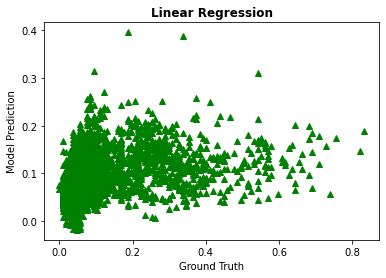

In [56]:
# plotting the model prediction vs true value

plt.plot(y_test, y_predict, "^", color = 'green')


plt.xlabel('Ground Truth')
plt.ylabel('Model Prediction')
plt.title('Linear Regression', 
         weight = 'bold',
         size = 12)
plt.show()

# Assessment of the Model Performance

In [57]:
# importing the metrics 

from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
from math import sqrt

In [58]:
# parameters for adjusted r2

k = X_test.shape[1]
n = X_test.shape[0]

In [59]:
k

27

In [60]:
n

5921

In [61]:
# assessments

RMSE = float(format(np.sqrt(mean_squared_error(y_test,y_predict)), '.3f'))
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)
adj = 1-(1-r2) * (n-1)/(n-k-1)

In [62]:
print('RMSE = ', RMSE, '\nMSE = ', MSE, '\nMAE = ', MAE, '\nr2 = ', r2, '\nAdjusted R2 = ', adj)


RMSE =  0.087 
MSE =  0.007493792595795055 
MAE =  0.0494629787660753 
r2 =  0.1672369015716163 
Adjusted R2 =  0.16342142496249246


In [63]:
# defining a function to obtain the feature weights of
# the linear model

def weights_df(model, feat, col_name):
    """
    this function returns the weight of every feature
    ON THE MODEL
    """
    weights = pd.Series(model.coef_, feat.columns).sort_values()
    weights_df = pd.DataFrame(weights).reset_index()
    weights_df.columns = ['Features', col_name]
    weights_df[col_name].round(3)
    return weights_df

In [64]:
# Obtaining the Linear model weights

linear_model_weights = weights_df(linear_model,
                                     X_train,
                                      'Linear_Model_Weight')

In [65]:
# printing the weights

linear_model_weights

Features  Linear_Model_Weight
0          RH_2            -0.425037
1         T_out            -0.305942
2            T2            -0.203519
3            T9            -0.129547
4          RH_8            -0.123726
5        RH_out            -0.087518
6            T4            -0.039769
7          RH_7            -0.036779
8          RH_9            -0.026970
9          RH_4            -0.019861
10           T5            -0.015702
11           T1            -0.010274
12          rv2             0.000915
13          rv1             0.000915
14  Press_mm_hg             0.007779
15         RH_5             0.010169
16   Visibility             0.010524
17           T7             0.015198
18    Windspeed             0.023678
19         RH_6             0.032856
20           T8             0.080641
21         RH_3             0.093635
22    Tdewpoint             0.114196
23       lights             0.130493
24           T6             0.219179
25           T3             0.289717
26         RH_1             0.522472

# 9. Penalizing 

- RIDGE REGRESSION

In [66]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=0.5)
ridge_reg.fit(X_train, y_train)

Ridge(alpha=0.5)

In [67]:
print('Linear Model Coefficient (m): ', ridge_reg.coef_)
print('Linear Model Coefficient (b): ', ridge_reg.intercept_)

Linear Model Coefficient (m):  [ 0.13140339 -0.02744913  0.48346486 -0.16474375 -0.37363518  0.28671696
  0.0924023  -0.0410309  -0.02107923 -0.02037827  0.01024506  0.19771034
  0.02980855  0.0151692  -0.03848572  0.07958376 -0.12289258 -0.12879301
 -0.02857356 -0.23759678  0.00739001 -0.06098562  0.02487664  0.01026224
  0.07428375  0.00089085  0.00089085]
Linear Model Coefficient (b):  0.1342906747155168


In [68]:
y_ridge_predict = ridge_reg.predict(X_test)
y_ridge_predict

array([0.03182566, 0.23001603, 0.03385524, ..., 0.06509776, 0.14820025,
       0.05475906])

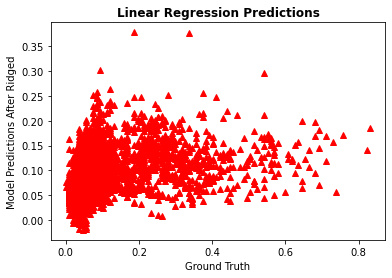

In [69]:
plt.plot(y_test, y_ridge_predict, "^", color = 'red')


plt.xlabel('Ground Truth')
plt.ylabel('Model Predictions After Ridged')
plt.title('Linear Regression Predictions', 
         weight = 'bold',
         size = 12)
plt.show()

In [70]:
RMSE = float(format(np.sqrt(mean_squared_error(y_test,y_ridge_predict)), '.3f'))
MSE = mean_squared_error(y_test, y_ridge_predict)
MAE = mean_absolute_error(y_test, y_ridge_predict)
r2 = r2_score(y_test, y_ridge_predict)
adj = 1-(1-r2) * (n-1)/(n-k-1)


In [71]:
print('RMSE = ', RMSE, '\nMSE = ', MSE, '\nMAE = ', MAE, '\nr2 = ', r2, '\nAdjusted R2 = ', adj)


RMSE =  0.087 
MSE =  0.007498034107425138 
MAE =  0.049415863646682115 
r2 =  0.16676555487741107 
Adjusted R2 =  0.16294791869578706


In [72]:
# defining a function to obtain the feature weights of
# the linear model

def ridge_weights(model, feat, col_name):
    """
    this function returns the weight of every feature
    ON THE MODEL
    """
    weights = pd.Series(model.coef_, feat.columns).sort_values()
    weights_df = pd.DataFrame(weights).reset_index()
    weights_df.columns = ['Features', col_name]
    weights_df[col_name].round(3)
    return weights_df

In [73]:
# obtaining ridge weights on the model

ridge_weight_df = ridge_weights(ridge_reg,X_train,
                                'Ridge_Weight')
ridge_weight_df

Features  Ridge_Weight
0          RH_2     -0.373635
1         T_out     -0.237597
2            T2     -0.164744
3            T9     -0.128793
4          RH_8     -0.122893
5        RH_out     -0.060986
6            T4     -0.041031
7          RH_7     -0.038486
8          RH_9     -0.028574
9            T1     -0.027449
10         RH_4     -0.021079
11           T5     -0.020378
12          rv2      0.000891
13          rv1      0.000891
14  Press_mm_hg      0.007390
15         RH_5      0.010245
16   Visibility      0.010262
17           T7      0.015169
18    Windspeed      0.024877
19         RH_6      0.029809
20    Tdewpoint      0.074284
21           T8      0.079584
22         RH_3      0.092402
23       lights      0.131403
24           T6      0.197710
25           T3      0.286717
26         RH_1      0.483465

- LASSO REGRESSION

In [74]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha = 0.0001)
lasso_reg.fit(X_train, y_train)

Lasso(alpha=0.0001)

In [ ]:
print('Linear Model Coefficient (m): ', lasso_reg.coef_)
print('Linear Model Coefficient (b): ', lasso_reg.intercept_)

In [75]:
y_lasso_predict = lasso_reg.predict(X_test)
y_lasso_predict

array([0.026322  , 0.19756943, 0.04164834, ..., 0.06460522, 0.14768507,
       0.0662353 ])

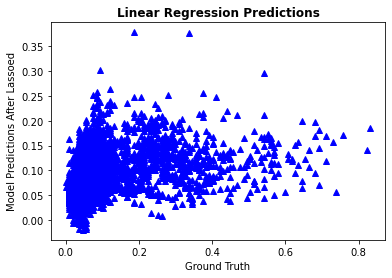

In [76]:
plt.plot(y_test, y_ridge_predict, "^", color = 'blue')


plt.xlabel('Ground Truth')
plt.ylabel('Model Predictions After Lassoed')
plt.title('Linear Regression Predictions', 
         weight = 'bold',
         size = 12)
plt.show()

In [77]:
def lasso_weights_df(model, feat, col_name):
    """
    this function returns the weight of every feature
    ON THE MODEL
    """
    weights = pd.Series(model.coef_, feat.columns).sort_values()
    weights_df = pd.DataFrame(weights).reset_index()
    weights_df.columns = ['Features', col_name]
    weights_df[col_name].round(3)
    return weights_df

In [78]:
# obtaining the lasso weights

lasso_weight_df = lasso_weights_df(lasso_reg, X_train,
                                'Lasso_Weight')

lasso_weight_df

Features  Lasso_Weight
0          RH_2 -1.681398e-01
1          RH_8 -1.155272e-01
2            T9 -1.049380e-01
3            T1 -5.909324e-02
4          RH_7 -4.754593e-02
5            T4 -3.942787e-02
6            T5 -3.018064e-02
7          RH_9 -1.716668e-02
8     Tdewpoint -7.487017e-03
9        RH_out -3.351602e-03
10           T7 -0.000000e+00
11           T2 -0.000000e+00
12  Press_mm_hg -0.000000e+00
13         RH_4 -0.000000e+00
14        T_out -0.000000e+00
15          rv2  7.630792e-19
16          rv1  1.710877e-04
17         RH_5  1.683746e-03
18         RH_6  1.894543e-03
19   Visibility  6.571678e-03
20    Windspeed  2.190948e-02
21           T6  2.427528e-02
22         RH_3  3.963773e-02
23           T8  4.103604e-02
24       lights  1.311446e-01
25           T3  2.256395e-01
26         RH_1  3.327747e-01

- Comparing the effects regularization

In [79]:
RMSE = float(format(np.sqrt(mean_squared_error(y_test,y_lasso_predict)), '.3f'))
MSE = mean_squared_error(y_test, y_lasso_predict)
MAE = mean_absolute_error(y_test, y_lasso_predict)
r2 = r2_score(y_test, y_lasso_predict)
adj = 1-(1-r2) * (n-1)/(n-k-1)


In [87]:
print('RMSE = ', RMSE, '\nMSE = ', MSE, '\nMAE = ', MAE, '\nr2 = ', r2, '\nAdjusted R2 = ', adj)


RMSE =  0.087 
MSE =  0.00760374873837885 
MAE =  0.04960740047595593 
r2 =  0.15501779931881376 
Adjusted R2 =  0.15114633836201896


In [92]:
# merging all the model weights together and compare 

final_weights = pd.merge(linear_model_weights,
                         ridge_weight_df, 
                         on = 'Features')
final_weights = pd.merge(final_weights,
                         lasso_weight_df,
                        on='Features')

In [91]:
final_weights

Features  Linear_Model_Weight  Ridge_Weight  Lasso_Weight
0          RH_2            -0.425037     -0.373635 -1.681398e-01
1         T_out            -0.305942     -0.237597 -0.000000e+00
2            T2            -0.203519     -0.164744 -0.000000e+00
3            T9            -0.129547     -0.128793 -1.049380e-01
4          RH_8            -0.123726     -0.122893 -1.155272e-01
5        RH_out            -0.087518     -0.060986 -3.351602e-03
6            T4            -0.039769     -0.041031 -3.942787e-02
7          RH_7            -0.036779     -0.038486 -4.754593e-02
8          RH_9            -0.026970     -0.028574 -1.716668e-02
9          RH_4            -0.019861     -0.021079 -0.000000e+00
10           T5            -0.015702     -0.020378 -3.018064e-02
11           T1            -0.010274     -0.027449 -5.909324e-02
12          rv2             0.000915      0.000891  7.630792e-19
13          rv1             0.000915      0.000891  1.710877e-04
14  Press_mm_hg             0.007779      0.007390 -0.000000e+00
15         RH_5             0.010169      0.010245  1.683746e-03
16   Visibility             0.010524      0.010262  6.571678e-03
17           T7             0.015198      0.015169 -0.000000e+00
18    Windspeed             0.023678      0.024877  2.190948e-02
19         RH_6             0.032856      0.029809  1.894543e-03
20           T8             0.080641      0.079584  4.103604e-02
21         RH_3             0.093635      0.092402  3.963773e-02
22    Tdewpoint             0.114196      0.074284 -7.487017e-03
23       lights             0.130493      0.131403  1.311446e-01
24           T6             0.219179      0.197710  2.427528e-02
25           T3             0.289717      0.286717  2.256395e-01
26         RH_1             0.522472      0.483465  3.327747e-01